<a href="https://colab.research.google.com/github/Lourdes-Tolotto/ML/blob/main/Clase3_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import neighbors
import numpy as np
import pandas as pd

In [ ]:
n_datos = 50

etiqueta1 = np.zeros(n_datos)
etiqueta2 = np.ones(n_datos)

#etiqueta1 = ['A'] * 50
#etiqueta2 = ['B'] * 50

etiqueta = np.append(etiqueta1,etiqueta2)

x1 = np.random.normal(0,2,n_datos)
y1 = np.random.normal(0,2,n_datos)
x2 = np.random.normal(3,2,n_datos)
y2 = np.random.normal(3,2,n_datos)
x = np.append(x1,x2)
y = np.append(y1,y2)

data = {'Etiqueta': etiqueta, 'X': x, 'Y': y}

df = pd.DataFrame(data)

#print(df)




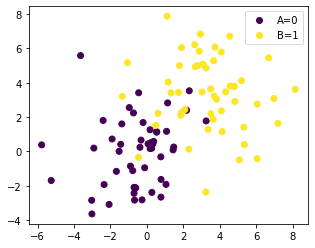

In [ ]:
from matplotlib import pyplot as plt

# Visualización 

x_index = 0
y_index = 1

plt.figure(figsize=(5, 4))
scatter = plt.scatter(df['X'],df['Y'], c=df['Etiqueta'])
plt.legend(handles=scatter.legend_elements()[0], labels= ['A=0','B=1'])

plt.show()

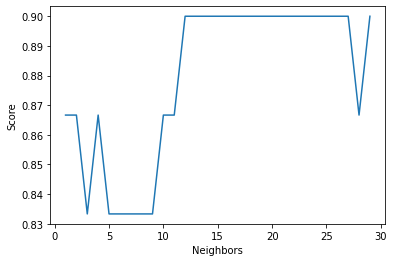

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        16
         1.0       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(df[['X','Y']],df['target'], test_size= 0.3,
                                    random_state = 20)

n = np.arange(1,30)
score = np.zeros(np.size(n))
accuracy = np.zeros(np.size(n))

for k in n:

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  Y_pred = knn.predict(X_test)
  score[k-1] = knn.score(X_test, Y_test)

  #print('score con k = ',i,'',knn.score(X_test, Y_test))
  #print('accuracy con k = ',i,'', metrics.accuracy_score(Y_pred, Y_test))

# Se grafica el score

plt.plot(n,score)
plt.xlabel('Neighbors')
plt.ylabel('Score')

plt.show()

# Se calculan el resto de los parametros

print(classification_report(Y_test, Y_pred))

#print(df.target[knn.predict([[3, 5]])])